<a href="https://colab.research.google.com/github/l3wandowskyy/ML_Project/blob/Projekt-main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetics_data.csv", sep=";", encoding='utf-8')

# Sprawdzenie liczby kolumn i wierszy
df.shape

# Sprawdzenie pierwszych wierszy
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.cze,0.351,31,No
2,8,183,64,0,0,23.mar,0.672,32,Yes
3,1,89,66,23,94,28.sty,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [ ]:
# Usunięcie duplikatów
df = df.drop_duplicates()

df.shape

(768, 9)

In [ ]:
# Sprawdzenie wartości wartości null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000


In [ ]:
df.info()

# Próba zamiany BMI i DiabetesPedigreeFunction na typ danych liczbowe, ale jest błąd

#df['BMI'] = df['BMI'].astype(float)
#df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    int64 
 2   BloodPressure             768 non-null    int64 
 3   SkinThickness             768 non-null    int64 
 4   Insulin                   768 non-null    int64 
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    int64 
 8   Outcome                   768 non-null    object
dtypes: int64(6), object(3)
memory usage: 54.1+ KB


In [ ]:
# Zamiana miesięcy na odpowiednie liczby
month_mapping = {
    'sty': '01',
    'lut': '02',
    'mar': '03',
    'kwi': '04',
    'maj': '05',
    'cze': '06',
    'lip': '07',
    'sie': '08',
    'wrz': '09',
    'paź': '10',
    'lis': '11',
    'gru': '12'
}

df['BMI'] = df['BMI'].replace(month_mapping, regex=True)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(month_mapping, regex=True)

# Zamiana 'bmi' i 'DiabetesPedigreeFunction' na float, ignorując wartości, które nie mogą być przekonwertowane
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['BMI'], errors='coerce')

In [ ]:
# Zamiana 0 na wartości średnie
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.269891,31.814219,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.029703,8.008770,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.020000,0.000000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.050000,27.030000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,67.100000,81.000000


In [ ]:
# Lista krotek zawierających nazwy kolumn oraz kwantyle Q1 i Q3
columns_iqr = [
    ('Pregnancies', 0.25, 0.75),
    ('SkinThickness', 0.25, 0.75),
    ('Insulin', 0.25, 0.75),
    ('BMI', 0.25, 0.75)
]

# Iterujemy przez każdą kolumnę i stosujemy metodę IQR do usuwania wartości odstających
for column, q1, q3 in columns_iqr:
    q1_val = df[column].quantile(q1)
    q3_val = df[column].quantile(q3)
    iqr = q3_val - q1_val

    # Usuwamy wartości odstające z tej kolumny
    df = df.drop(df.loc[df[column] > (q3_val + 1.5 * iqr)].index)
    df = df.drop(df.loc[df[column] < (q1_val - 1.5 * iqr)].index)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.00000
mean,3.826220,117.596757,71.793576,25.176266,91.594834,31.283196,30.749726,33.18750
std,3.270546,28.684443,11.909577,8.115342,33.919367,6.295094,7.468173,11.81847
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.020000,0.000000,21.00000
25%,1.000000,97.000000,64.000000,20.536458,79.799479,26.772500,26.050000,24.00000
50%,3.000000,113.000000,70.000000,20.536458,79.799479,31.600000,31.200000,29.00000
75%,6.000000,133.250000,80.000000,31.000000,94.000000,35.400000,35.400000,41.00000
max,13.000000,199.000000,122.000000,49.000000,196.000000,47.900000,47.900000,81.00000


In [ ]:
# Utworzenie obiektu encodera
le = LabelEncoder()

# Zamiana wartości Credit Score na liczbowe, dzięki labelencodera
df.Outcome = le.fit_transform(df.Outcome)

# Sprawdzenie czy wszystko się zakodowało poprawnie

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'No': 0, 'Yes': 1}


Najlepsza wartość k: 21
Accuracy k-NN: 0.7461928934010152
Cross-Validation Scores k-NN: [0.72826087 0.75       0.81521739 0.75       0.82417582]
Mean Cross-Validation Score k-NN: 0.7735308170090779


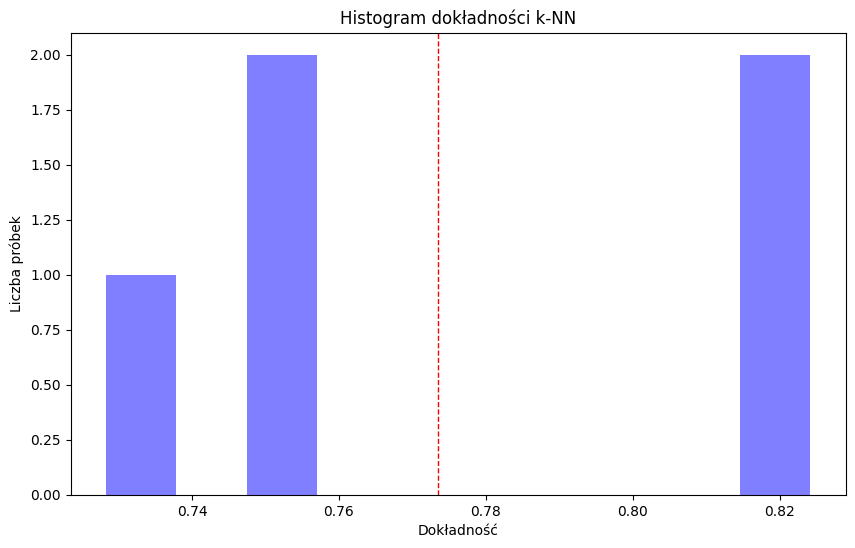

In [ ]:
# Podział danych na cechy (features) i etykiety (labels)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skalowanie danych (opcjonalne, ale może poprawić wydajność k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Znalezienie optymalnej wartości parametru k dla k-NN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}  # Testujemy wartości k od 1 do 30
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_knn_model = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']
print("Najlepsza wartość k:", best_k)

# Modelowanie k-NN z optymalnym parametrem k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy k-NN:", knn_accuracy)

# Walidacja krzyżowa dla k-NN
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores k-NN:", knn_cv_scores)
print("Mean Cross-Validation Score k-NN:", np.mean(knn_cv_scores))

# Wykres histogramu dokładności k-NN
plt.figure(figsize=(10, 6))
plt.hist(knn_cv_scores, bins=10, alpha=0.5, color='blue')
plt.axvline(np.mean(knn_cv_scores), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Dokładność')
plt.ylabel('Liczba próbek')
plt.title('Histogram dokładności k-NN')
plt.show()

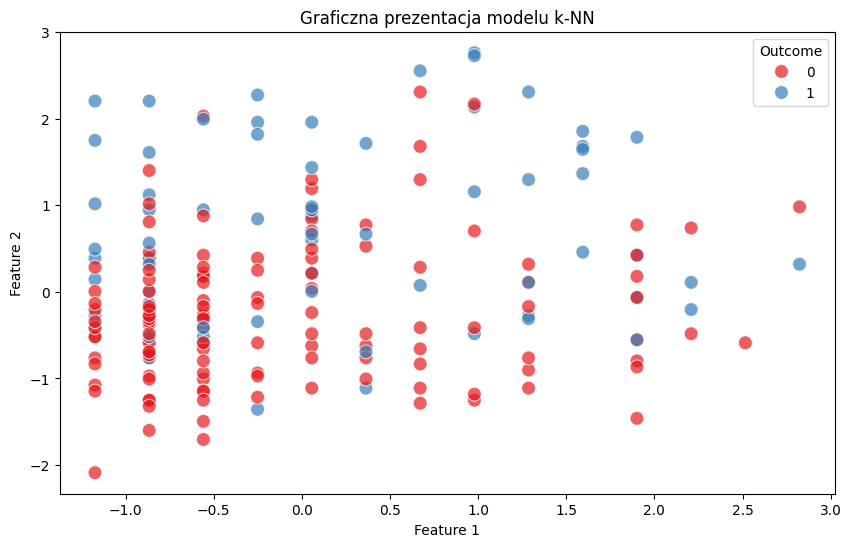

In [ ]:
# Graficzna prezentacja modelu k-NN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test, palette='Set1', s=100, alpha=0.7)
plt.title('Graficzna prezentacja modelu k-NN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Outcome', loc='upper right')
plt.show()